In [76]:
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [77]:
mnist = tf.keras.datasets.fashion_mnist

In [78]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [79]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [80]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

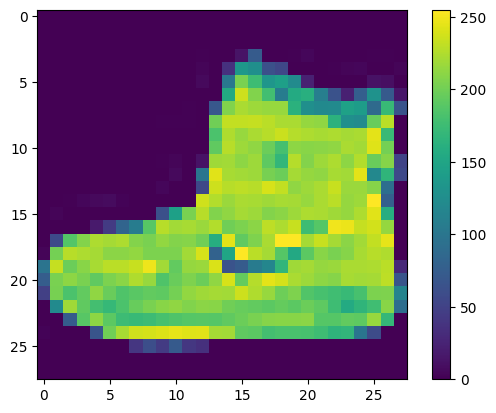

In [81]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [82]:
x_train = x_train/255.0
x_test = x_test/255.0

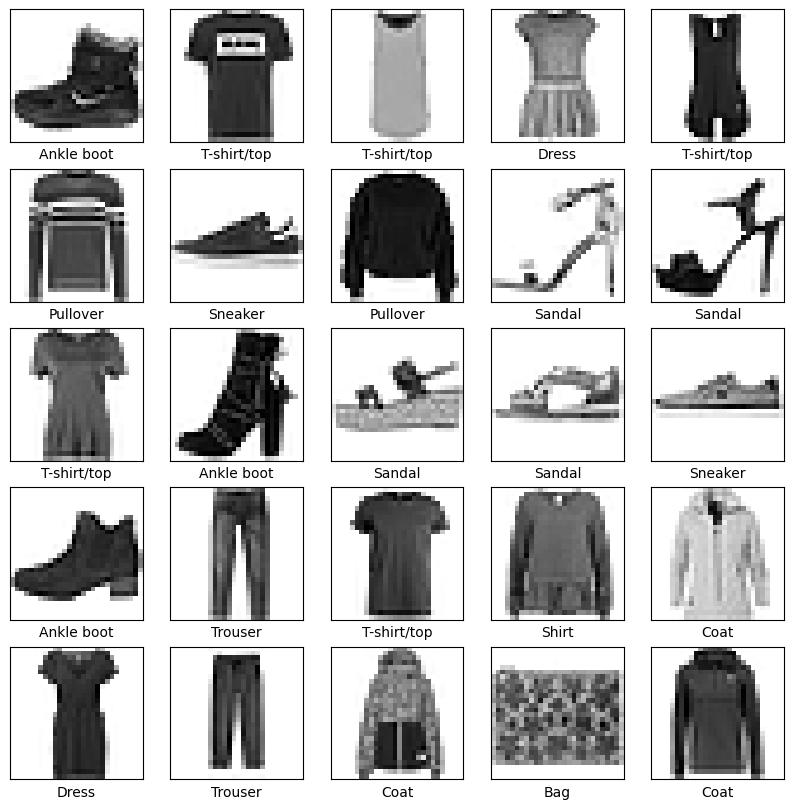

In [83]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [84]:
y_train[24]

4

In [85]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [86]:
model.compile(optimizer='adam', 
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=['accuracy'])
              

In [87]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7844 - loss: 0.6347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.3954
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8715 - loss: 0.3487
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8866 - loss: 0.3110
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8893 - loss: 0.3001
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8918 - loss: 0.2868
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9027 - loss: 0.2674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9042 - loss: 0.2578
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9039 - loss: 0.2553
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9112 - loss: 0.2384


In [88]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - 2ms/step - accuracy: 0.8783 - loss: 0.3536
Test accuracy: 0.8783000111579895


In [89]:
# Make prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) #attch softmax layer to convert the model's linear output to probabilities

In [90]:
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


In [91]:
predictions[2]

array([2.2117528e-11, 1.0000000e+00, 3.6643265e-16, 5.7015963e-14,
       2.5522885e-12, 2.4355264e-24, 1.2121674e-14, 6.1139471e-25,
       8.2276630e-15, 2.4100835e-23], dtype=float32)

In [92]:
import numpy as np
class_id = np.argmax(predictions[2])

In [93]:
print(class_id)

1


In [94]:
class_label = class_names[class_id]
print(class_label)

Trouser


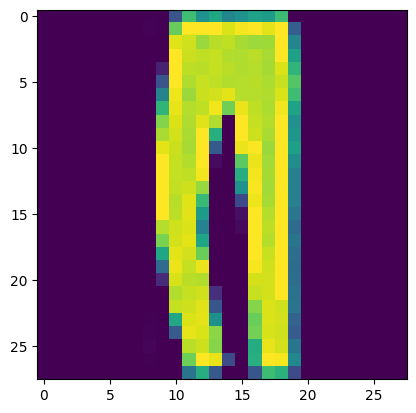

In [95]:
plt.figure()
plt.imshow(x_test[2])

In [98]:
#Graph full set of 10 classes predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color= 'red'
    
    plt.xlabel("{} {:0.2f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
        true_label = true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_array)
        
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')
        
    

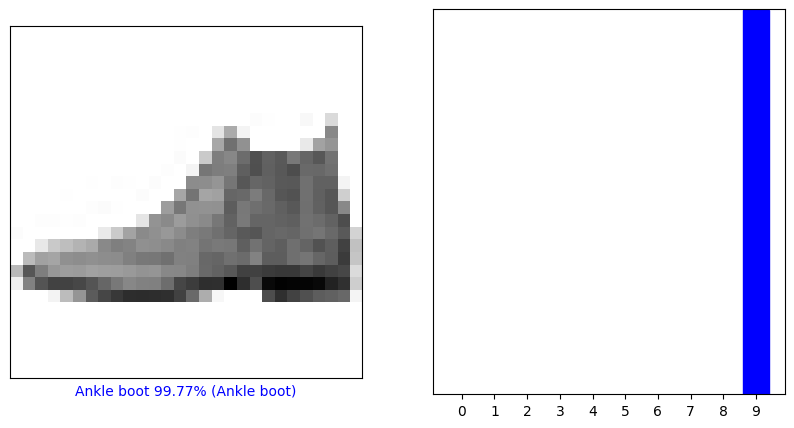

In [99]:
# verify prediction
i = 0
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)
plt.show()

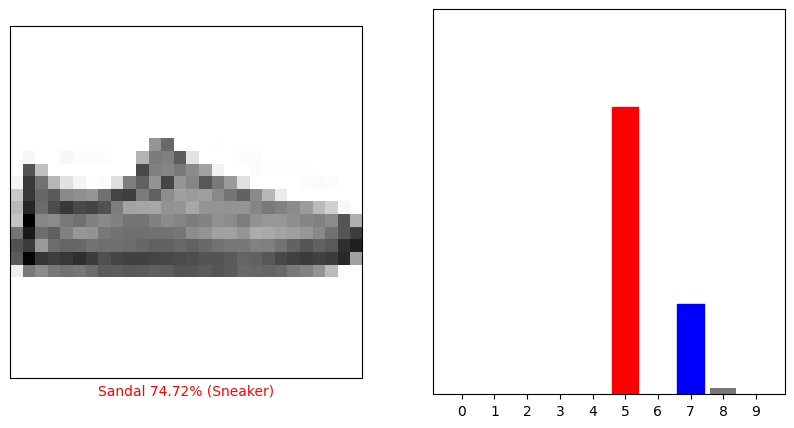

In [100]:
# verify prediction
i = 12
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)
plt.show()

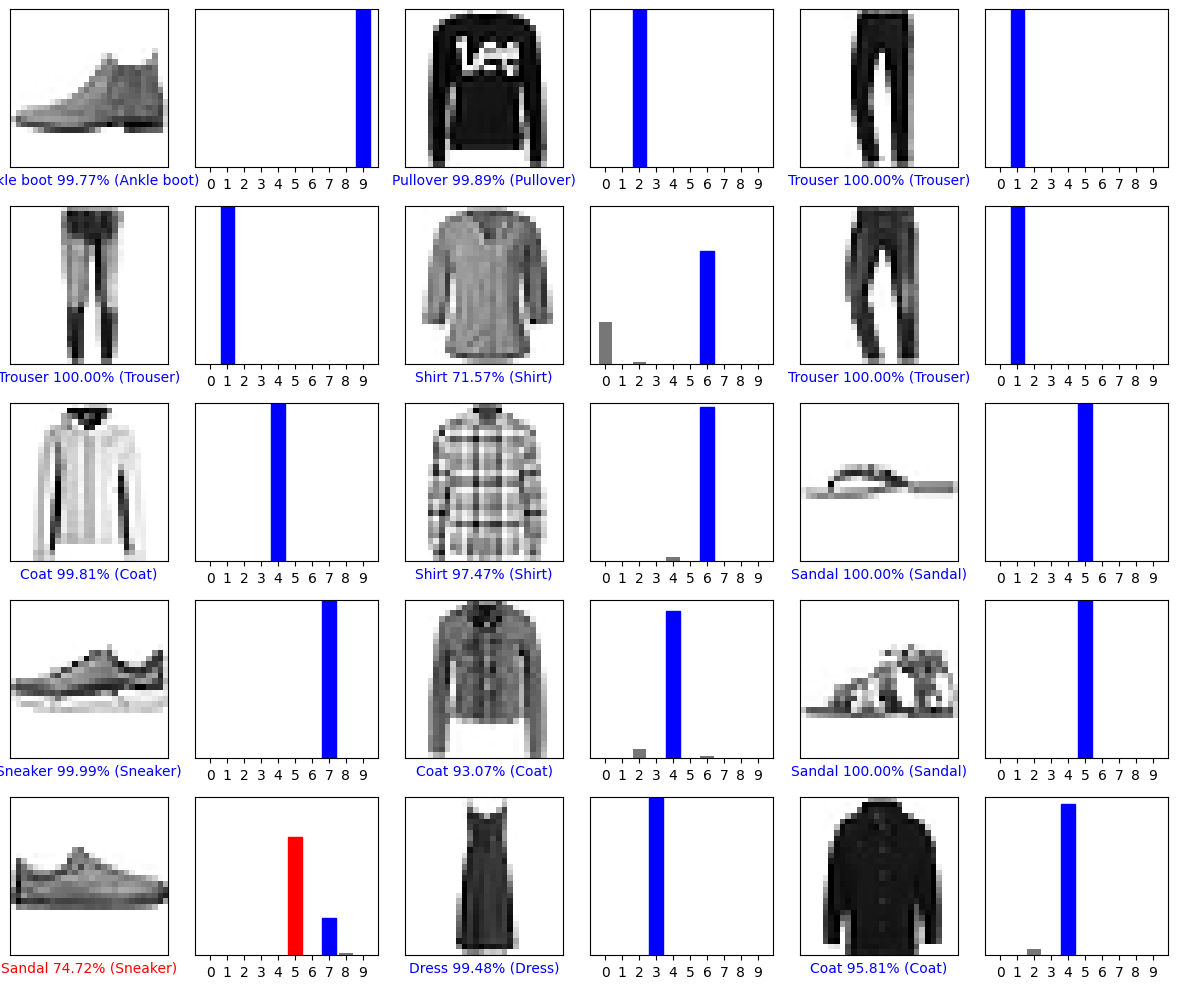

In [103]:
#predict several image
row = 5
col = 3
num_images = row*col
plt.figure(figsize=(2*2*col, 2*row))
for i in range(num_images):
    plt.subplot(row, 2*col, 2*i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(row,  2*col, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [104]:
test_image = x_test[1]

In [105]:
test_image.shape

(28, 28)

In [109]:
img = np.expand_dims(test_image, axis=0)

In [110]:
img.shape

(1, 28, 28)

In [112]:
single_predict = probability_model.predict(img)
print(single_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.1903229e-05 1.2775505e-12 9.9892235e-01 1.6784881e-13 6.5725198e-04
  2.9193350e-14 4.0852587e-04 2.2054524e-16 5.2058337e-11 4.6089680e-17]]


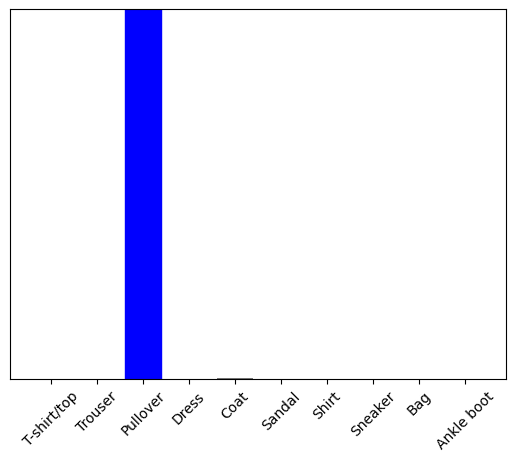

In [114]:
plot_value_array(1, single_predict[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [115]:
np.argmax(single_predict[0])

2